In [1]:
import timeit

import numpy as np
from matplotlib import pyplot as plt
import cv2
path = './models/blender/lego/test_preds/000.png'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

uint8


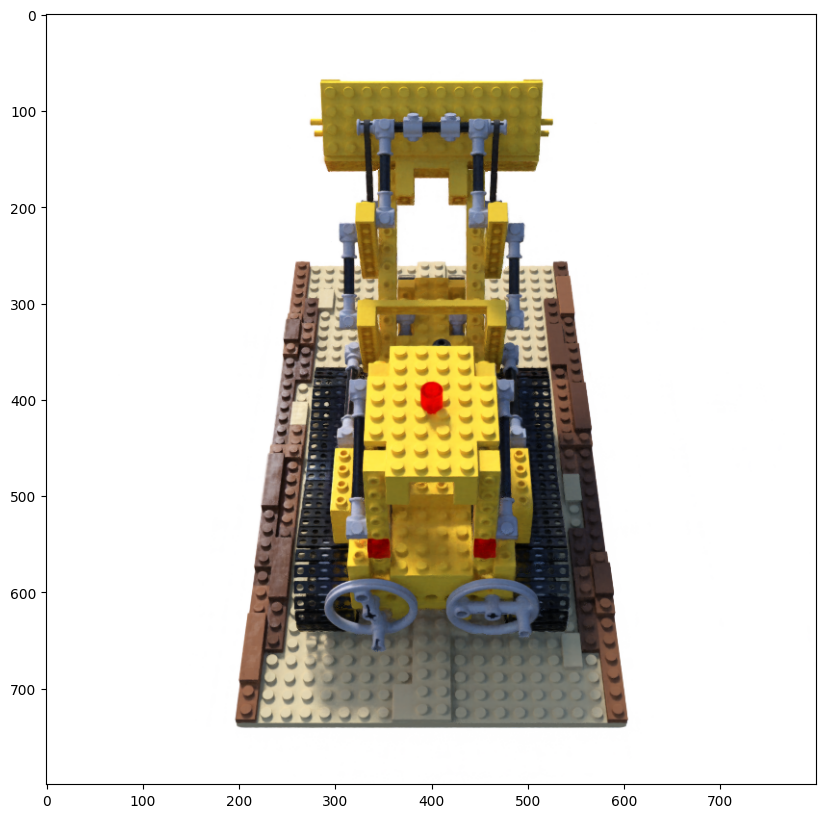

In [3]:
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

## SIFT

Keypoint count: 2103
time: 0.103892s


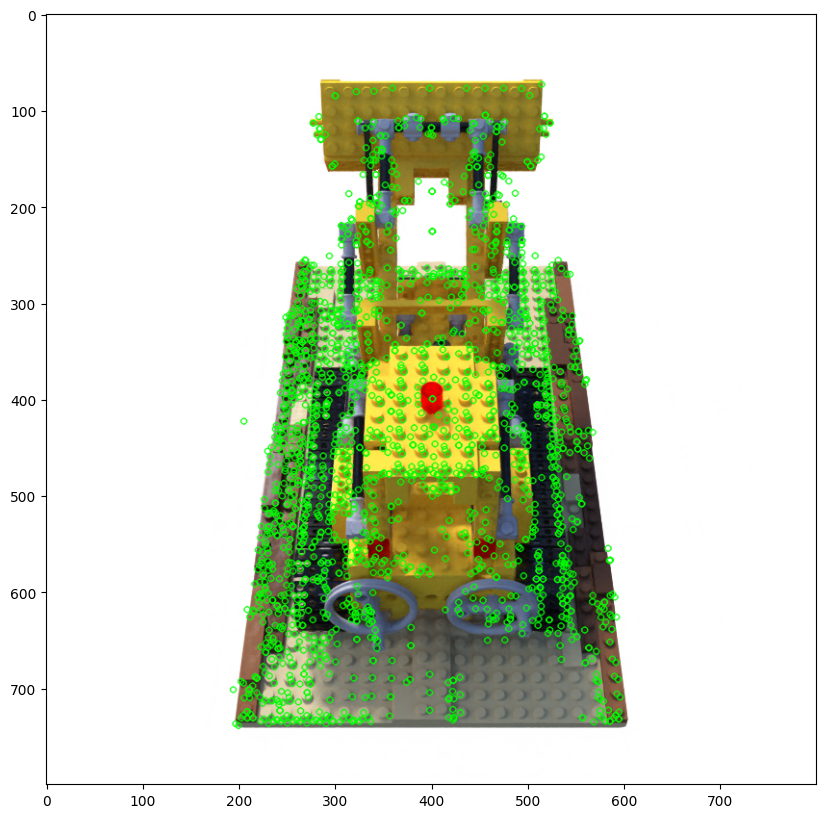

In [16]:
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)
sift_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
print('Keypoint count:', len(kp))
print(f'time: {timeit.timeit(lambda: sift.detect(gray, None), number = 100)/100:.6f}s')
plt.imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB));

## ORB

Keypoint count: 2000
time: 0.012770s


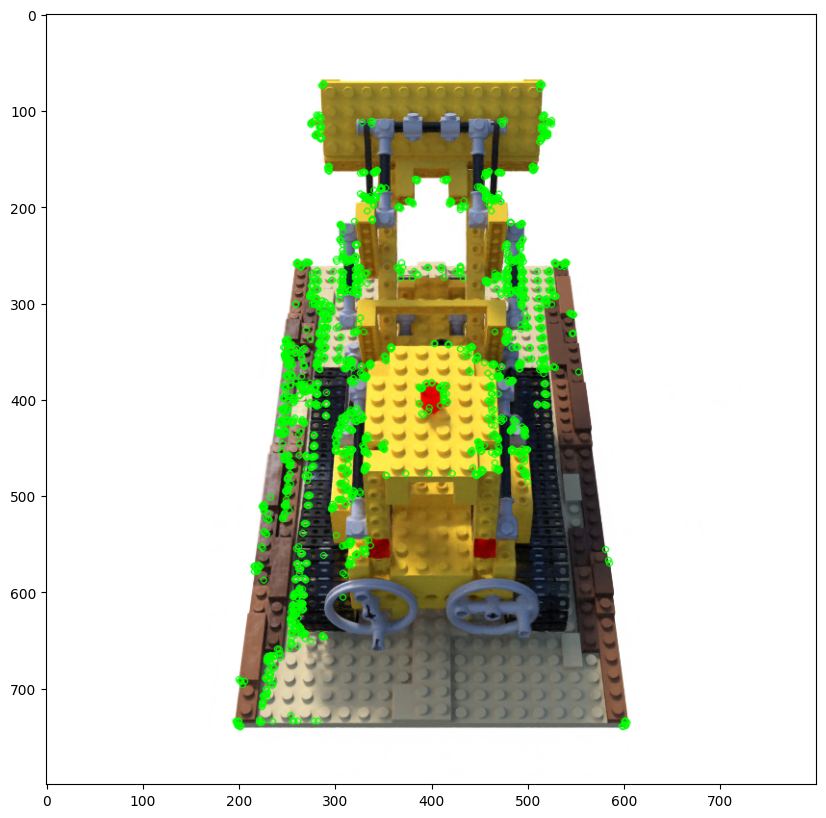

In [17]:
orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray, None)
orb_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
print('Keypoint count:', len(kp))
print(f'time: {timeit.timeit(lambda: orb.detectAndCompute(gray, None), number = 100)/100:.6f}s')
plt.imshow(cv2.cvtColor(orb_img, cv2.COLOR_BGR2RGB));

## Harris Corner

time: 0.004650s


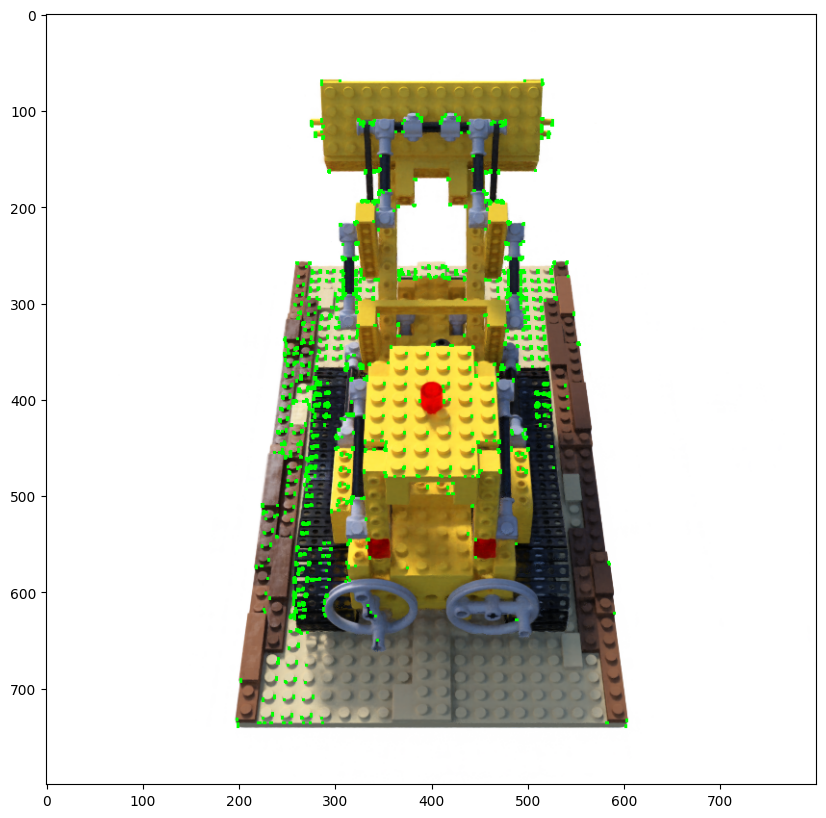

In [18]:
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
harris = img.copy()
harris[dst > 0.01 * dst.max()] = [0, 255, 0]
print(f'time: {timeit.timeit(lambda: cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04), number = 100)/100:.6f}s')
plt.imshow(cv2.cvtColor(harris, cv2.COLOR_BGR2RGB));

## Shi-Thomasi Corner

Keypoint count: 1187
time: 0.008370s


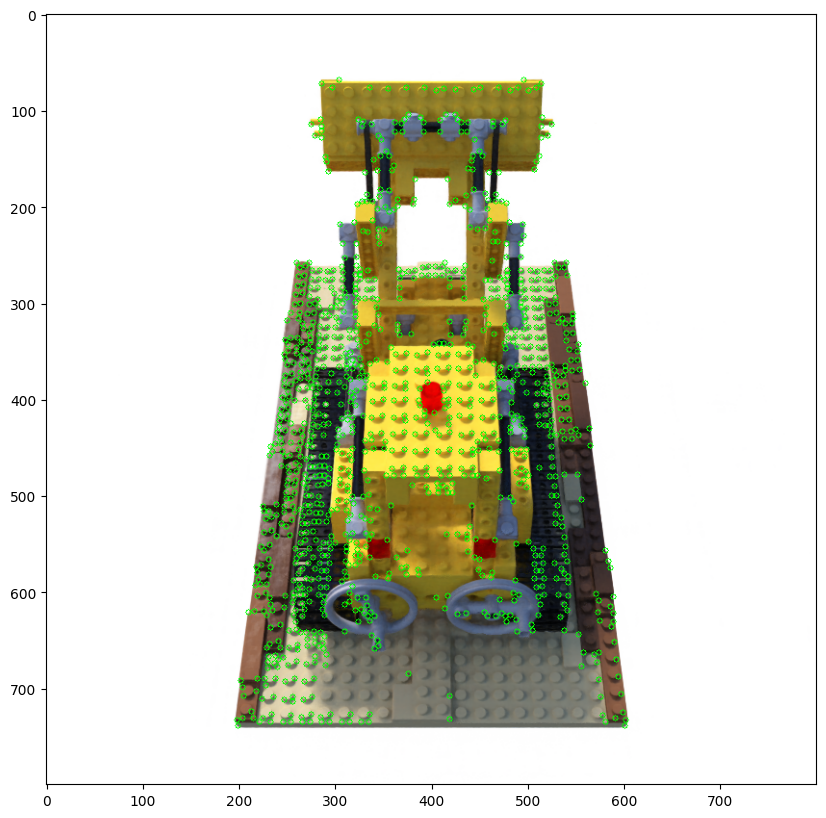

In [22]:
corners = cv2.goodFeaturesToTrack(gray, maxCorners=2000, qualityLevel=0.02, minDistance=5)
corners = np.float32(corners)
print('Keypoint count:', len(corners))
print(f'time: {timeit.timeit(lambda: cv2.goodFeaturesToTrack(gray, maxCorners=2000, qualityLevel=0.02, minDistance=20), number = 100)/100:.6f}s')

shi_thomasi = img.copy()
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(shi_thomasi, (x, y), 3, (0, 255, 0))

plt.imshow(cv2.cvtColor(shi_thomasi, cv2.COLOR_BGR2RGB));

## FAST

Keypoint count: 4105
time: 0.001941s


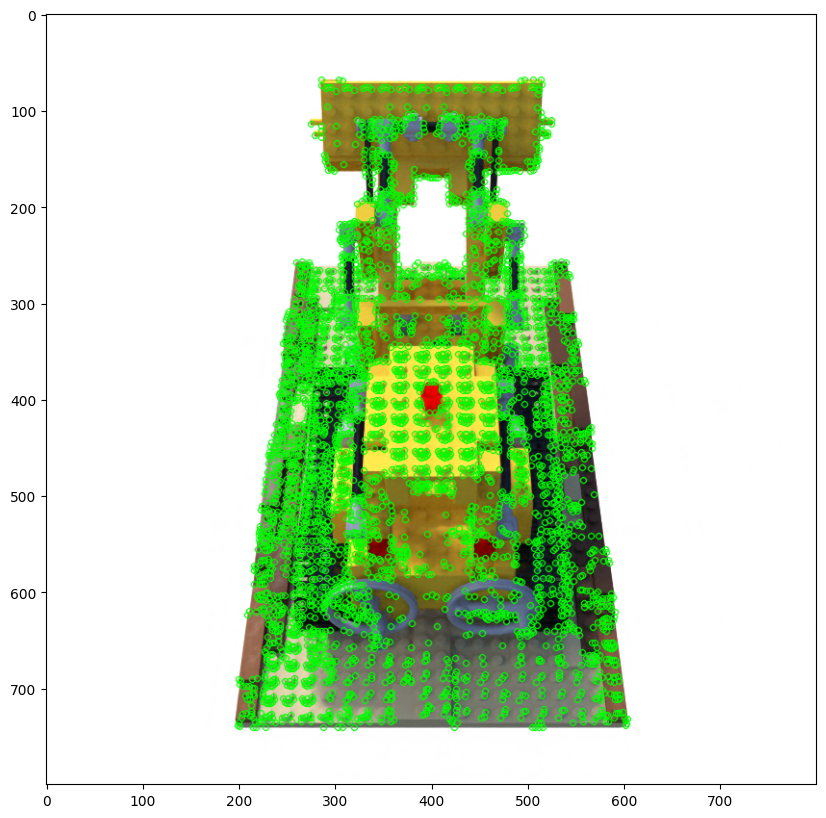

In [23]:
fast = cv2.FastFeatureDetector_create()
#fast.setNonmaxSuppression(False)
kp = fast.detect(gray, None)
fast_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))
print('Keypoint count:', len(kp))
print(f'time: {timeit.timeit(lambda: fast.detect(gray, None), number = 100)/100:.6f}s')
plt.imshow(cv2.cvtColor(fast_img, cv2.COLOR_BGR2RGB));